## Import

In [1]:
import random
import pandas as pd
import numpy as np
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings(action='ignore') 

## Fixed Random-Seed

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

## Load Data

In [3]:
train_df = pd.read_csv('./open/train.csv')
test_df = pd.read_csv('./open/test.csv')

## Data Pre-Processing

In [4]:
#시계열 특성을 학습에 반영하기 위해 timestamp를 월, 일, 시간으로 나눕니다
train_df['year'] = train_df['timestamp'].apply(lambda x : int(x[0:4]))
train_df['month'] = train_df['timestamp'].apply(lambda x : int(x[5:7]))
train_df['day'] = train_df['timestamp'].apply(lambda x : int(x[8:10]))

test_df['year'] = test_df['timestamp'].apply(lambda x : int(x[0:4]))
test_df['month'] = test_df['timestamp'].apply(lambda x : int(x[5:7]))
test_df['day'] = test_df['timestamp'].apply(lambda x : int(x[8:10]))

In [5]:
#학습에 사용하지 않을 변수들을 제거합니다
train_x = train_df.drop(columns=['ID', 'timestamp', 'supply(kg)', 'price(원/kg)'])
train_y = train_df['price(원/kg)']

test_x = test_df.drop(columns=['ID', 'timestamp'])

In [6]:
#질적 변수들을 수치화합니다
qual_col = ['item', 'corporation', 'location']

for i in qual_col:
    le = LabelEncoder()
    train_x[i]=le.fit_transform(train_x[i])
    test_x[i]=le.transform(test_x[i]) #test 데이터에 대해서 fit하는 것은 data leakage에 해당합니다

print('Done.')

Done.


## Regression Model Fit

In [7]:
model = RandomForestRegressor()
model.fit(train_x, train_y)

RandomForestRegressor()

## Inference

In [8]:
preds = model.predict(test_x)

## Submission

In [9]:
submission = pd.read_csv('./open/sample_submission.csv')
submission

,ID,answer
0,TG_A_J_20230304,0
1,TG_A_J_20230305,0
2,TG_A_J_20230306,0
3,TG_A_J_20230307,0
4,TG_A_J_20230308,0
...,...,...
1087,RD_F_J_20230327,0
1088,RD_F_J_20230328,0
1089,RD_F_J_20230329,0
1090,RD_F_J_20230330,0


In [10]:
submission['answer'] = preds
submission

,ID,answer
0,TG_A_J_20230304,3636.64
1,TG_A_J_20230305,4109.28
2,TG_A_J_20230306,401.82
3,TG_A_J_20230307,3277.93
4,TG_A_J_20230308,3067.03
...,...,...
1087,RD_F_J_20230327,271.27
1088,RD_F_J_20230328,441.28
1089,RD_F_J_20230329,439.31
1090,RD_F_J_20230330,436.00


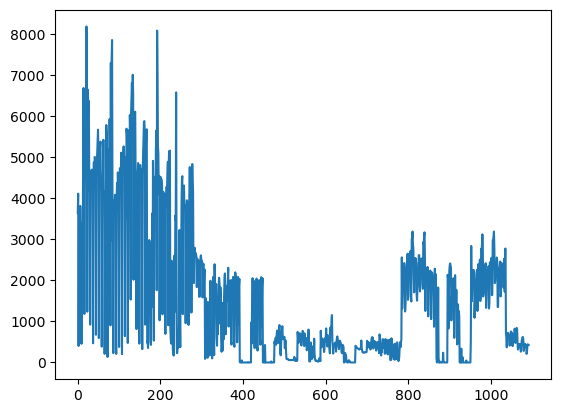

In [13]:
import matplotlib.pyplot as plt
plt.plot(preds)

In [11]:
submission.to_csv('./baseline_submission.csv', index=False)